In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display first few rows
print("Customers:")
print(customers.head())



Customers:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [3]:
print("\nProducts:")
print(products.head())



Products:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [4]:
print("\nTransactions:")
print(transactions.head())


Transactions:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [5]:
print("Missing values in Customers:")
print(customers.isnull().sum())

Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [6]:
print("\nMissing values in Products:")
print(products.isnull().sum())


Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [7]:
print("\nMissing values in Transactions:")
print(transactions.isnull().sum())


Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
# Check for duplicates
print("\nDuplicates in each dataset:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Duplicates in each dataset:
Customers: 0
Products: 0
Transactions: 0


In [9]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
print("\nUnique Prices in Products:")
print(products['Price'].unique())


Unique Prices in Products:
[169.3  346.3   44.12  95.69 429.31 121.32 420.15 146.85 325.01 350.13
 261.2  159.6  114.2   26.26 158.93 330.05 469.77 436.89 385.37 396.34
 335.84 137.54 454.53 338.66 284.62  64.38 229.06 235.58 433.64 277.86
 196.4  488.63  64.25 217.05  30.59 372.55 459.86 147.22 430.59 153.19
 456.28 379.44 404.4   18.82 481.78 366.07 159.33 416.4  147.95 437.65
  65.16 354.81 274.94  57.3  128.53  16.08 239.7  157.62 303.2  155.65
 156.96 374.16  33.59 452.42 427.61 337.22 300.68 447.23 100.81  48.69
 127.36 399.34  26.99 295.58 497.76 429.29 265.51  41.18 417.37 303.5
  66.32  55.99 455.72 337.91 416.35 440.7  290.17 263.55 220.91 165.3
 222.95 389.2  304.94 447.34 227.26 307.47 319.34 299.93 354.29 126.34]


In [11]:
print("\nUnique Prices in Transactions:")
print(transactions['Price'].unique())



Unique Prices in Transactions:
[300.68 217.05 239.7  147.95 290.17 274.94 454.53 100.81 227.26 374.16
 456.28 155.65  57.3   48.69 350.13 153.19 420.15 147.22 416.35 156.96
 337.91  44.12  65.16 440.7  159.33 447.23 389.2  429.29 372.55 114.2
 157.62 437.65 277.86 284.62 229.06  41.18 126.34 430.59 330.05 137.54
 335.84 399.34 303.2  196.4  379.44 295.58 488.63 325.01  66.32 261.2
 307.47 469.77 416.4  354.81 427.61  33.59 220.91 263.55 337.22 158.93
 169.3  304.94  26.99 121.32 128.53 452.42 165.3  436.89 455.72 404.4
  30.59  64.25  26.26  95.69 433.64 319.34 303.5  354.29 385.37 396.34
  18.82 346.3   16.08  55.99 159.6  497.76 429.31 235.58 447.34 417.37
 338.66 146.85 222.95 127.36 299.93  64.38 481.78 366.07 265.51 459.86]


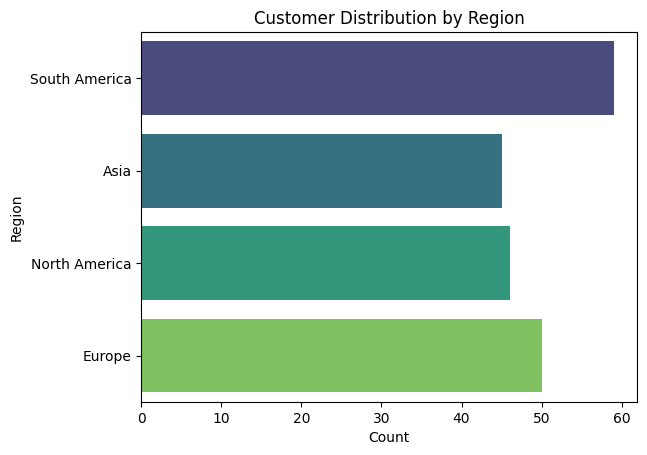

In [12]:
sns.countplot(y='Region', data=customers, palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()


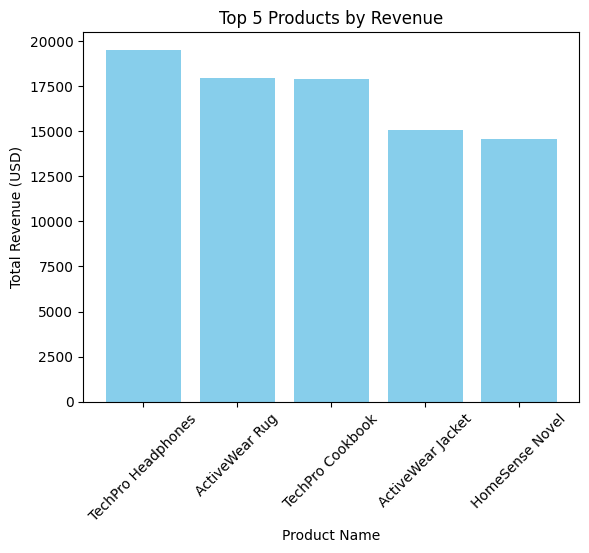

In [13]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().nlargest(5)
top_products = top_products.reset_index().merge(products, on='ProductID')

plt.bar(top_products['ProductName'], top_products['TotalValue'], color='skyblue')
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()


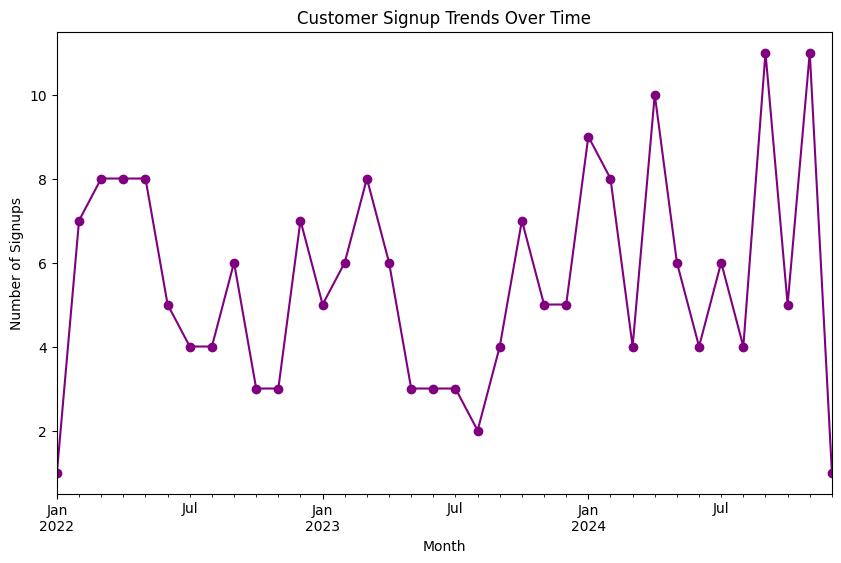

In [14]:
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
signup_trends.plot(kind='line', marker='o', figsize=(10, 6), color='purple')
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()


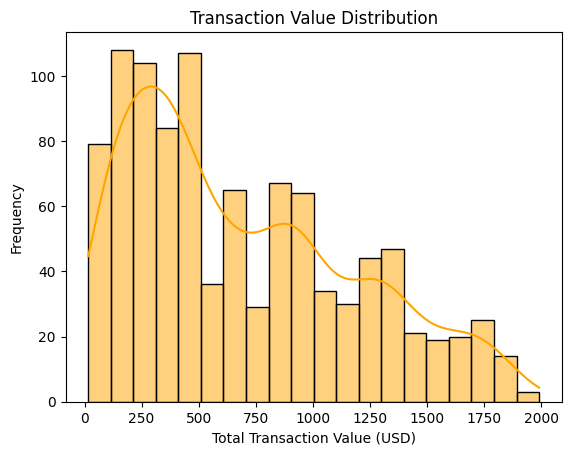

In [15]:
sns.histplot(transactions['TotalValue'], bins=20, kde=True, color='orange')
plt.title("Transaction Value Distribution")
plt.xlabel("Total Transaction Value (USD)")
plt.ylabel("Frequency")
plt.show()


In [16]:
# Exploratory Data Analysis Insights
# Customer Distribution by Region:
# South America has the highest number of customers, followed closely by Europe. This suggests that these regions are the primary markets for the business.

# Top Revenue-Generating Products:
# The "TechPro Headphone" is the most sold product, generating approximately $18,500 in revenue. The "Activewear Rug" and "TechPro Cookbook" are tied for second place, each contributing around $17,500 to total revenue.

# Signup Trends:
# The lowest customer signups occurred in July of both 2022 and 2023. However, a significant surge in signups was recorded in 2024, marking it as the highest signup year.

# Transaction Value Analysis:

# Minimum Transaction Value: $2,000.
# Most Frequent Transaction Range: $100–$500, with a frequency exceeding 100 transactions.
# Average Transaction Value: Approximately $750–$800, with an average transaction frequency of 50–60 units.

In [17]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics.pairwise import cosine_similarity

# # Load datasets
# customers = pd.read_csv("Customers.csv")
# products = pd.read_csv("Products.csv")
# transactions = pd.read_csv("Transactions.csv")

# # Merge transactions with product and customer data
# transactions = transactions.merge(products, on="ProductID", how="left")
# transactions = transactions.merge(customers, on="CustomerID", how="left")

# # Aggregate transaction data for each customer
# customer_features = transactions.groupby('CustomerID').agg({
#     'TotalValue': 'sum',    # Total spending
#     'Quantity': 'sum',      # Total products purchase        # Average price of purchased products
#     'Region': 'first',      # Customer region
#     'Category': lambda x: x.mode()[0],  # Most purchased product category
# }).reset_index()

# # Encode categorical features (Region and Category)
# customer_features = pd.get_dummies(customer_features, columns=['Region', 'Category'], drop_first=True)

# # Scale numerical features for similarity computation
# scaler = MinMaxScaler()
# scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Aggregate transaction data for each customer
customer_agg = merged_data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],  # Total and average spending
    'Quantity': ['sum'],           # Total quantity purchased
    'Category': lambda x: x.nunique(),  # Number of unique categories bought
    'Region': 'first',             # Region of the customer
    'SignupDate': 'first'          # Signup date
}).reset_index()
customer_agg.columns = ['CustomerID', 'TotalSpend', 'AvgSpend', 'TotalQuantity', 'UniqueCategories', 'Region', 'SignupDate']

# Encode categorical variables
le_region = LabelEncoder()
customer_agg['RegionEncoded'] = le_region.fit_transform(customer_agg['Region'])

# Convert SignupDate to numerical (e.g., days since signup)
customer_agg['SignupDate'] = pd.to_datetime(customer_agg['SignupDate'])
customer_agg['DaysSinceSignup'] = (pd.Timestamp.now() - customer_agg['SignupDate']).dt.days
customer_agg = customer_agg.drop(['Region', 'SignupDate'], axis=1)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_agg.drop('CustomerID', axis=1))

# Fit KNN model
knn_model = NearestNeighbors(n_neighbors=4, metric='euclidean')
knn_model.fit(scaled_features)

# Find top 3 similar customers for first 20 customers
lookalike_results_knn = {}
for idx, customer_id in enumerate(customer_agg['CustomerID'][:20]):
    distances, indices = knn_model.kneighbors([scaled_features[idx]], n_neighbors=4)  # Include self
    lookalikes = [(customer_agg['CustomerID'][i], 1 / (1 + distances[0][j])) for j, i in enumerate(indices[0][1:])]  # Exclude self
    lookalike_results_knn[customer_id] = lookalikes

# Save results to CSV
lookalike_df_knn = pd.DataFrame({
    "CustomerID": list(lookalike_results_knn.keys()),
    "Lookalikes": [str(v) for v in lookalike_results_knn.values()]
})
lookalike_df_knn.to_csv("Lookalike_KNN.csv", index=False)


In [19]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Create user-product matrix
user_product_matrix = merged_data.pivot_table(index='CustomerID', columns='ProductID', values='TotalValue', fill_value=0)

# Apply SVD
svd = TruncatedSVD(n_components=10, random_state=42)
reduced_features = svd.fit_transform(user_product_matrix)

# Compute cosine similarity
similarity_matrix = cosine_similarity(reduced_features)
similarity_df = pd.DataFrame(similarity_matrix, index=user_product_matrix.index, columns=user_product_matrix.index)

# Get top 3 similar customers for first 20 customers
lookalike_results_svd = {}
for customer_id in similarity_df.index[:20]:
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).iloc[1:4]  # Exclude self
    lookalike_results_svd[customer_id] = list(zip(similar_customers.index, similar_customers.values))

# Save results to CSV
lookalike_df_svd = pd.DataFrame({
    "CustomerID": list(lookalike_results_svd.keys()),
    "Lookalikes": [str(v) for v in lookalike_results_svd.values()]
})
lookalike_df_svd.to_csv("Lookalike_SVD.csv", index=False)


c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


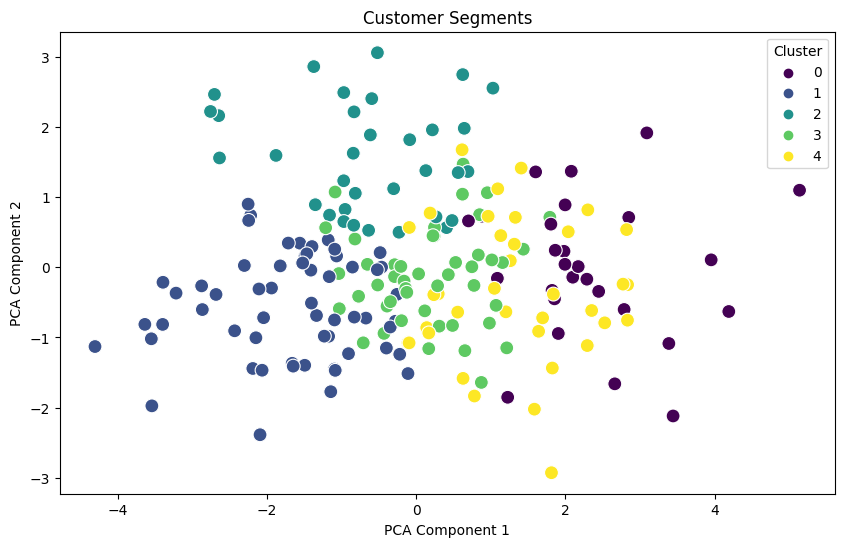

Davies-Bouldin Index: 1.3605086245858091
Silhouette Score: 0.21305459946162025


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Aggregate transaction data
transaction_agg = transactions.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],  # Total and average spending
    'TransactionID': 'count',       # Transaction frequency
    'ProductID': lambda x: x.nunique()  # Product diversity
}).reset_index()
transaction_agg.columns = ['CustomerID', 'TotalSpend', 'AvgSpend', 'TransactionFrequency', 'ProductDiversity']

# Merge with customer data
data = customers.merge(transaction_agg, on='CustomerID', how='left')

# Handle missing values (if any)
data.fillna(0, inplace=True)

# Encode categorical features
le_region = LabelEncoder()
data['RegionEncoded'] = le_region.fit_transform(data['Region'])

# Convert SignupDate to numerical feature (e.g., days since signup)
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['DaysSinceSignup'] = (pd.Timestamp.now() - data['SignupDate']).dt.days

# Drop unnecessary columns
data = data.drop(['CustomerName', 'Region', 'SignupDate'], axis=1)

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('CustomerID', axis=1))

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust n_clusters
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_data, data['Cluster'])
sil_score = silhouette_score(scaled_data, data['Cluster'])

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data['PCA1'], data['PCA2'] = pca_data[:, 0], pca_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Save clustering results
data.to_csv('Customer_Segmentation.csv', index=False)

# Print metrics
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {sil_score}")


c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\sklearn\

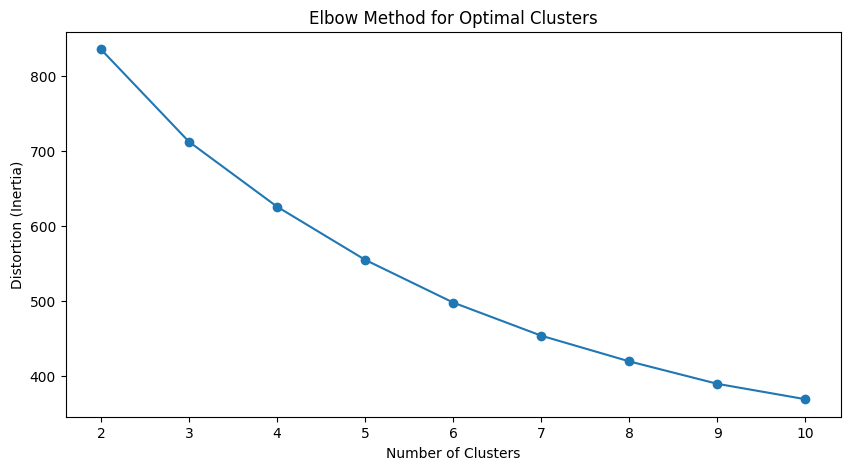

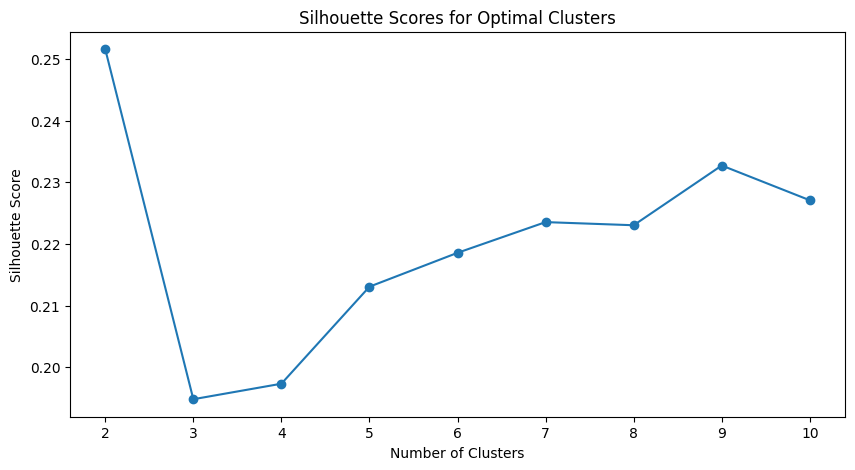

In [21]:
from sklearn.metrics import silhouette_score
distortions = []
sil_scores = []
for k in range(2, 11):  # Test for 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)  # Sum of squared distances
    sil_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score

# Adjust DBSCAN parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)

# Check clusters
unique_labels = set(clusters)
print(f"Clusters: {unique_labels}")

# Exclude noise and compute DBI if multiple clusters exist
if len(unique_labels - {-1}) > 1:  # Exclude noise
    db_index = davies_bouldin_score(scaled_data, clusters)
    print(f"Davies-Bouldin Index: {db_index}")
else:
    print("DBSCAN failed to form sufficient clusters.")



Clusters: {-1}
DBSCAN failed to form sufficient clusters.


In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)  # Explicitly set n_init
kmeans.fit(scaled_data)
from sklearn.cluster import DBSCAN

# Experiment with different values of eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=3)  # Start with a larger eps
clusters = dbscan.fit_predict(scaled_data)

# Check the clusters
unique_labels = set(clusters)
print(f"Clusters: {unique_labels}")

# Evaluate only if there are multiple clusters
if len(unique_labels - {-1}) > 1:  # Exclude noise
    db_index = davies_bouldin_score(scaled_data, clusters)
    print(f"Davies-Bouldin Index (DBSCAN): {db_index}")
else:
    print("DBSCAN failed to form sufficient clusters.")


Clusters: {0, 1, -1}
Davies-Bouldin Index (DBSCAN): 1.5096522365276244


Cluster sizes: Counter({-1: 194, 0: 3, 1: 3})
Davies-Bouldin Index (K-Means): 1.6188115519559394


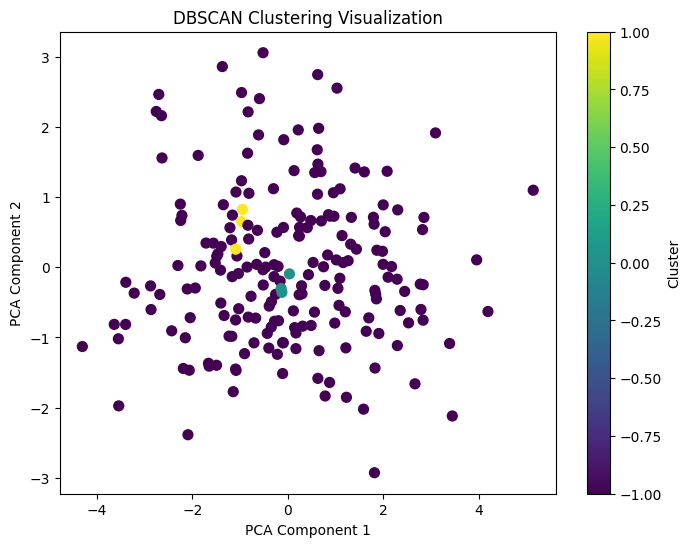

In [25]:
from collections import Counter

cluster_counts = Counter(dbscan.labels_)
print(f"Cluster sizes: {cluster_counts}")
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Adjust n_clusters if needed
kmeans_labels = kmeans.fit_predict(scaled_data)
db_index_kmeans = davies_bouldin_score(scaled_data, kmeans_labels)
print(f"Davies-Bouldin Index (K-Means): {db_index_kmeans}")
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan.labels_, cmap='viridis', s=50)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


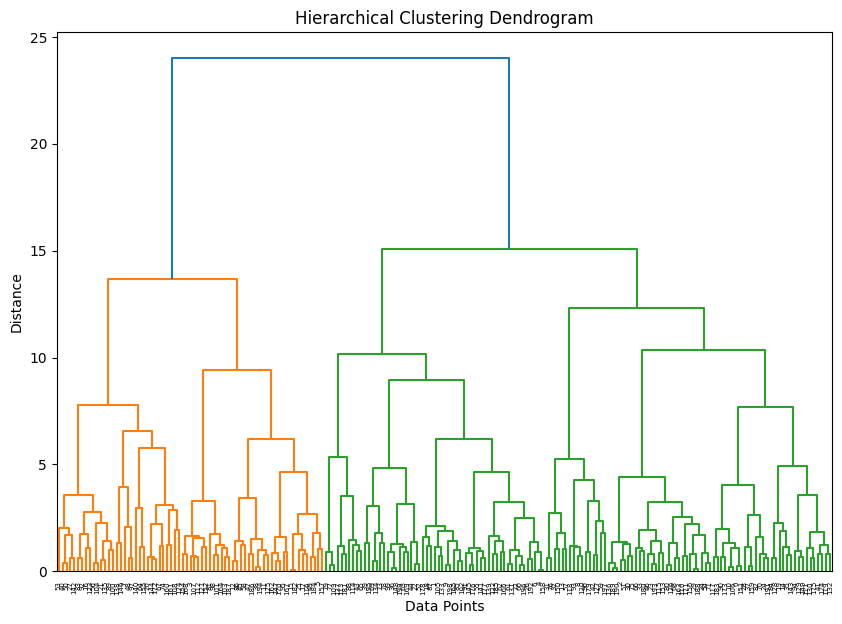

Davies-Bouldin Index (Hierarchical): 1.7729934670721292


In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Form clusters
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')  # Adjust 't' for number of clusters
data['Cluster_Hierarchical'] = clusters
from sklearn.metrics import davies_bouldin_score
db_index_hierarchical = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index (Hierarchical): {db_index_hierarchical}")


Davies-Bouldin Index (GMM): 1.9783934396877891


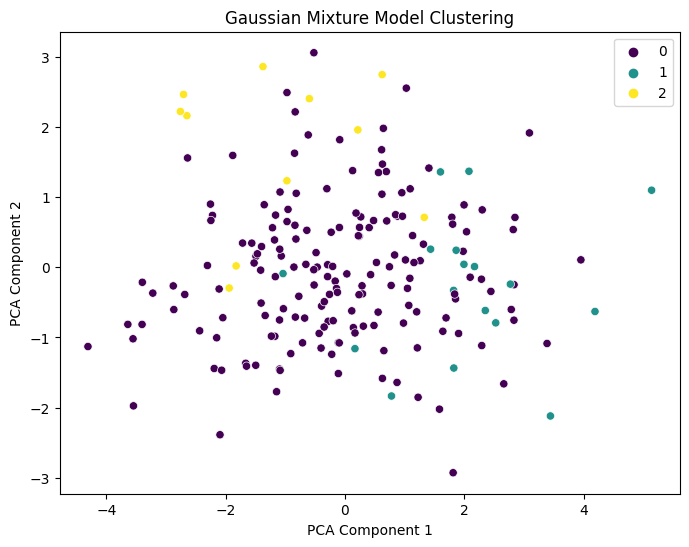

In [27]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components
gmm_labels = gmm.fit_predict(scaled_data)

# Add labels to the dataset
data['Cluster_GMM'] = gmm_labels

# Evaluate using DBI
db_index_gmm = davies_bouldin_score(scaled_data, gmm_labels)
print(f"Davies-Bouldin Index (GMM): {db_index_gmm}")
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=gmm_labels, palette="viridis")
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
